# Adding topography to geological models
***
This chapter shows how to make geological models look more realistic by incorporating topography data:
- The data can either be stored in a raster file that can be conveniently loaded into gempy.
- For demonstration purposes GemPy also provides a tool to create a random hilly landscape to limit the models on the surface.

***

In [1]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

### 1. The common procedure to set up a model:

In [2]:
geo_model = gp.create_model('Tutorial_ch1-7_Single_layer_topo')

gp.init_data(geo_model, extent=[440720, 441129, 69280,69689,-200,250],resolution = (50,50,50),
                         path_i = os.pardir+"/data/input_data/tut-ch1-7/onelayer_interfaces.csv",
                         path_o = os.pardir+"/data/input_data/tut-ch1-7/onelayer_orient.csv")



Tutorial_ch1-7_Single_layer_topo  2019-06-04 17:07

In [3]:
# use happy spring colors! 
geo_model.surfaces.colors.change_colors({'layer1':'#ff8000','basement':'#88cc60'})

,surface,series,order_surfaces,isBasement,color,id
0,layer1,Default series,1,False,#ff8000,1
1,basement,Basement,1,True,#88cc60,2


In [4]:
%matplotlib inline
gp.map_series_to_surfaces(geo_model, {'series':('layer1','basement')})

,surface,series,order_surfaces,isBasement,color,id
0,layer1,series,1,False,#ff8000,1
1,basement,series,2,True,#88cc60,2


### 2. Adding topography

#### 2.b create fun topography

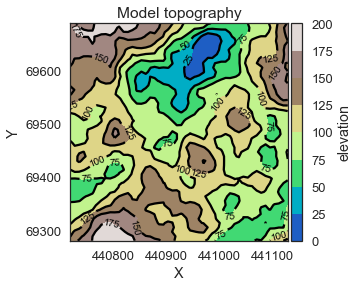

In [5]:
geo_model.set_topography(d_z=np.array([0,200]))

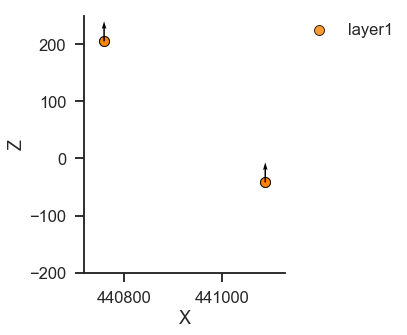

In [6]:
gp.plot.plot_data(geo_model)

#### 2 a. Load from raster file

In [7]:
fp = os.pardir+"/data/input_data/tut-ch1-7/bogota.tif"

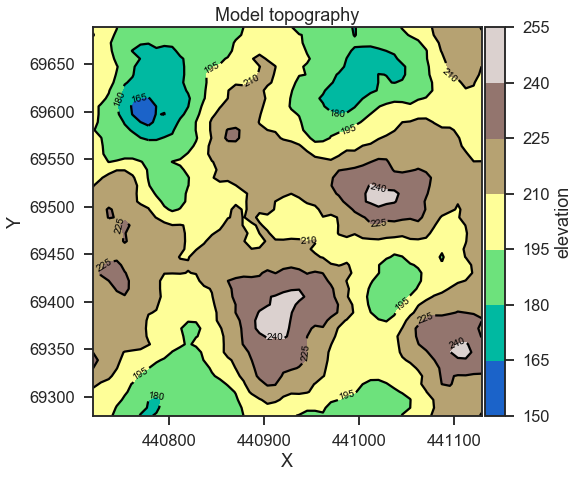

In [8]:
geo_model.set_topography()

In [16]:
vtkp = gp.plot.plot_3D(geo_model)

In [10]:
vtkp.resume()

In [9]:
geo_model.grid.topography.load_from_gdal(filepath=fp)

[440720 471440  69280 100000] [512 512]
Cropped raster to geo_model.grid.extent.
[440720 441129  69280  69689] [7 7]
storing converted file...


[440720 471440  69280 100000] [512 512]
Cropped raster to geo_model.grid.extent.
[440720 441129  69280  69689] [7 7]
storing converted file...


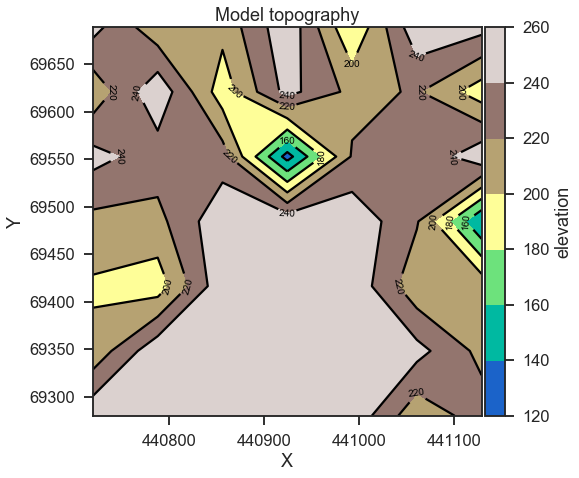

In [10]:
geo_model.set_topography(source='gdal',filepath=fp)

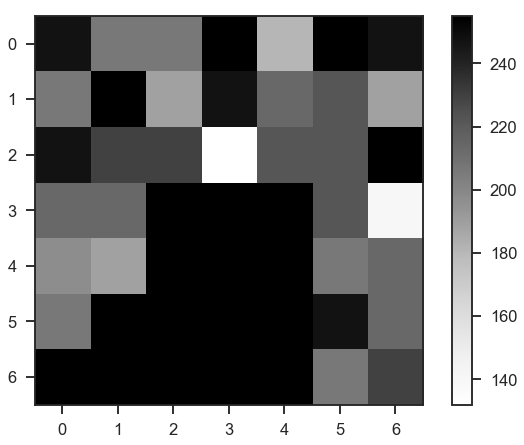

In [11]:
plt.imshow(geo_model.grid.topography.topo.dem_zval)
plt.colorbar()

In [12]:
gp.set_interpolation_data(geo_model,
                          output='geology', compile_theano=True,
                          theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [13]:
gp.compute_model(geo_model)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

In [14]:
vtkp = gp.plot.plot_3D(geo_model)

holding... Use vtk.resume to go back to the interactive window


In [15]:
vtkp.set_real_time_on()

In [16]:
vtkp.update_model()

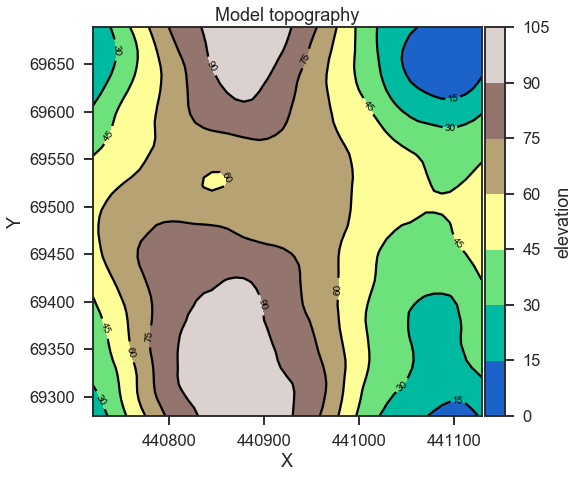

In [17]:
geo_model.set_topography(d_z=np.array([0,100]), fd=0.9, plot_object= vtkp)

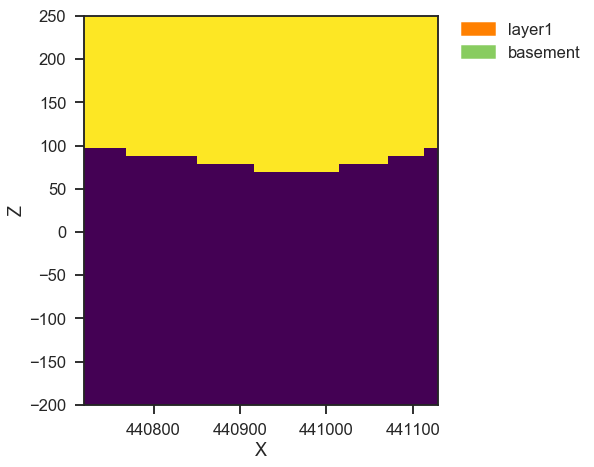

In [18]:
gp.plot.plot_section(geo_model, 25, direction='y', block=geo_model.grid.regular_grid.mask_topo,
                show_topo=False)

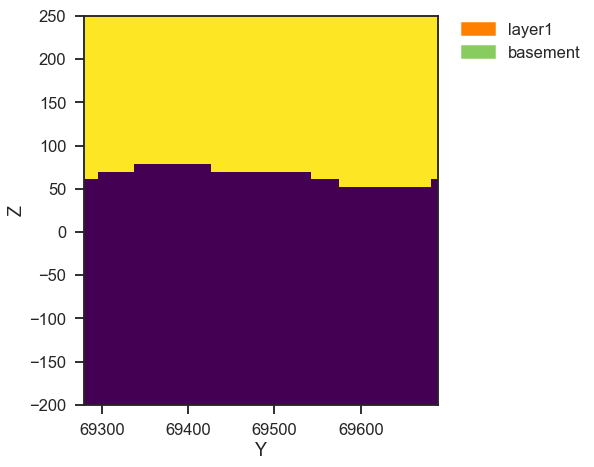

In [19]:
gp.plot.plot_section(geo_model, 25, direction='x', block=geo_model.grid.regular_grid.mask_topo,
                show_topo=False)
